<a href="https://colab.research.google.com/github/FranBe/cangrejos/blob/desarrollo/Cangrejos2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerías

In [ ]:
# Básicas
import pandas as pd
import numpy as np

In [ ]:
# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Sklearn ML
from sklearn import datasets
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from itertools import combinations
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize


In [ ]:
# Sklearn métricas
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Estadísticas
from scipy.stats import f_oneway
from scipy import stats
import statsmodels.api as sm

## Ingesta de datos

In [ ]:
# Carga del dataset
dfCangre = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR42Z5BNxHUNED18y3hyppc9T5g-X1oDi9I6b2X8HRy3eB-jpXo7a3XIVWdwWOyEeodwXM5c0YPUYCQ/pub?output=csv')

## Análisis exploratorio de datos

### Primeras aproxaciones

In [ ]:
dfCangre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sex             3893 non-null   object
 1   Length          3893 non-null   object
 2   Diameter        3893 non-null   object
 3   Height          3893 non-null   object
 4   Weight          3893 non-null   object
 5   Shucked Weight  3893 non-null   object
 6   Viscera Weight  3893 non-null   object
 7   Shell Weight    3893 non-null   object
 8   Age             3893 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 273.9+ KB


In [ ]:
# Primeras filas
dfCangre.head()

Sex  Length Diameter  Height       Weight Shucked Weight Viscera Weight  \
0   F  1,4375    1,175  0,4125   24,6357155     12,3320325      5,5848515   
1   M  0,8875     0,65  0,2125   5,40057975      2,2963095     1,37495075   
2   I  1,0375    0,775    0,25   7,95203475       3,231843     1,60174675   
3   F   1,175   0,8875    0,25  13,48018725     4,74854125     2,28213475   
4   I  0,8875   0,6625  0,2125   6,90310325       3,458639     1,48834875   

  Shell Weight  Age  
0     6,747181    9  
1    1,5592225    6  
2   2,76407625    6  
3    5,2446575   10  
4      1,70097    6

In [ ]:
# Últimas filas
dfCangre.tail()

Sex  Length Diameter  Height       Weight Shucked Weight Viscera Weight  \
3888   F  1,4625   1,1375   0,325  24,81998725     11,6516445     5,85417175   
3889   F    1,55   1,2125  0,4375  34,45881725     15,4504775      7,1724235   
3890   I   0,625   0,4625  0,1625    2,0128145      0,7654365     0,52446575   
3891   I  1,0625    0,775  0,2625   10,3475675      4,5075705     2,33883375   
3892   I  0,7875   0,6125  0,2125   4,06815325      1,5025235     1,34660125   

     Shell Weight  Age  
3888    6,3786375    8  
3889    9,7805775   10  
3890   0,63786375    5  
3891    2,9766975    6  
3892     1,417475    8

Valores nulos

In [ ]:
dfCangre.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

Valores duplicados

In [ ]:
# Verifica si hay filas duplicadas
dfCangre.duplicated().sum()

0

In [ ]:
#Frecuencias
# Crear una lista para almacenar los resultados como diccionarios
resultados = []

# Itera sobre todas las columnas del DataFrame
for columna in dfCangre.columns:
    # Count: Número de elementos no nulos en la columna
    count = dfCangre[columna].count()

    # Unique: Lista de valores únicos en la columna
    unique_values = dfCangre[columna].nunique()

    # Top: Valor más frecuente en la columna
    top_value = dfCangre[columna].mode().iloc[0]

    # Freq: Frecuencia del valor más común en la columna
    freq_value = dfCangre[columna].value_counts().iloc[0]

    # Crea un diccionario con los resultados y agrégalo a la lista
    resultado_actual = {'Columna': columna, 'Count': count, 'NUnique': unique_values, 'Top': top_value, 'Frequency': freq_value}
    resultados.append(resultado_actual)

# Crea el DataFrame a partir de la lista de diccionarios
resultados_df = pd.DataFrame(resultados)

# Muestra el DataFrame con los resultados
resultados_df

Columna  Count  NUnique          Top  Frequency
0             Sex   3893        3            M       1435
1          Length   3893      134       1,5625         91
2        Diameter   3893      111        1,125        131
3          Height   3893       51        0,375        247
4          Weight   3893     2343  32,16250775          7
5  Shucked Weight   3893     1482    4,9611625         11
6  Viscera Weight   3893      867   4,86193925         15
7    Shell Weight   3893      907    7,7961125         42
8             Age   3893       28            9        640

### Preprocesamiento de datos

Se transforman los valores de Length,	Diameter,	Height,	Weight,	Shucked Weight	Viscera Weight, Shell Weight a float y Age a Int, ya que originariamente son reconocidos como tipo "Object" por Pandas.


In [ ]:
dfCangre['Length'] = dfCangre['Length'].str.replace(',', '.')
dfCangre['Diameter'] = dfCangre['Diameter'].str.replace(',', '.')
dfCangre['Height'] = dfCangre['Height'].str.replace(',', '.')
dfCangre['Weight'] = dfCangre['Weight'].str.replace(',', '.')
dfCangre['Shucked Weight'] = dfCangre['Shucked Weight'].str.replace(',', '.')
dfCangre['Viscera Weight'] = dfCangre['Viscera Weight'].str.replace(',', '.')
dfCangre['Shell Weight'] = dfCangre['Shell Weight'].str.replace(',', '.')

dfCangre['Length'] = dfCangre['Length'].astype(float)
dfCangre['Diameter'] = dfCangre['Diameter'].astype(float)
dfCangre['Height'] = dfCangre['Height'].astype(float)
dfCangre['Weight'] = dfCangre['Weight'].astype(float)
dfCangre['Shucked Weight'] = dfCangre['Shucked Weight'].astype(float)
dfCangre['Viscera Weight'] = dfCangre['Viscera Weight'].astype(float)
dfCangre['Shell Weight'] = dfCangre['Shell Weight'].astype(float)

dfCangre['Age'] = dfCangre['Age'].astype(int)


Las medidas están en pies y onzas, por lo que se hace una conversión a centimetros y Kilogramos respectivamente

In [ ]:
# Pies a centímetros
dfCangre['Length'] = dfCangre['Length'] * 30.48
dfCangre['Diameter'] = dfCangre['Diameter'] * 30.48
dfCangre['Height'] = dfCangre['Height'] * 30.48

# Onzas a kilogramos
dfCangre['Weight'] = dfCangre['Weight'] * 0.0283495
dfCangre['Shucked Weight'] = dfCangre['Shucked Weight'] * 0.0283495
dfCangre['Viscera Weight'] = dfCangre['Viscera Weight'] * 0.0283495
dfCangre['Shell Weight'] = dfCangre['Shell Weight'] * 0.0283495

Codificación de sexo para posteriores análisis

In [ ]:
# Se realiza una codificación directa, para decidir que número corresponde a cada clase
dfCangre['Sex'] = dfCangre['Sex'].replace({'F': 0, 'M': 1, 'I': 2})

In [ ]:
# Revisión del dataset modificado
dfCangre.head()

Sex  Length  Diameter  Height    Weight  Shucked Weight  Viscera Weight  \
0   F  43.815    35.814  12.573  0.698410        0.349607        0.158328   
1   M  27.051    19.812   6.477  0.153104        0.065099        0.038979   
2   I  31.623    23.622   7.620  0.225436        0.091621        0.045409   
3   F  35.814    27.051   7.620  0.382157        0.134619        0.064697   
4   I  27.051    20.193   6.477  0.195700        0.098051        0.042194   

   Shell Weight  Age  
0      0.191279    9  
1      0.044203    6  
2      0.078360    6  
3      0.148683   10  
4      0.048222    6

Según revisión de bibliografía, los datos

In [ ]:
#Se calculan la masa y la relación largo-diametro para agregar nuevos datos que mejoren la predicción
#masa
dfCangre['BMI'] = dfCangre['Weight']/(dfCangre['Length'] ** 2)
# Length to diameter ratio
dfCangre['Len_dia_ratio'] = dfCangre['Length'] / dfCangre['Diameter']


### Análisis univariado

> Variable categórica "Sex"

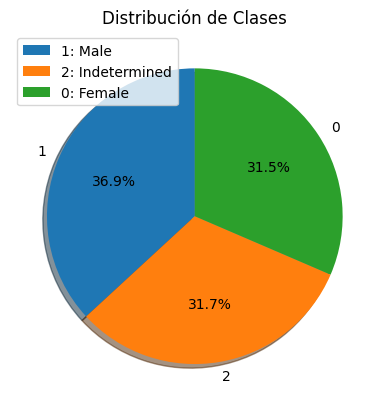

In [ ]:
#Distribucion de clases de Sexo
# Calcular el conteo de valores en la columna 'income-class'
value_counts = dfCangre['Sex'].value_counts()
# Crear una figura y un eje para el gráfico de torta
fig, ax = plt.subplots()
# Configurar etiquetas y porcentajes
labels = value_counts.index
sizes = value_counts.values
explode = (0.1, 0)  # Separa el primer sector (<=50K) del resto
# Generar el gráfico de torta
ax.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title('Distribución de Clases')
plt.legend(["1: Male","2: Indetermined", "0: Female"],loc="best")
plt.show()

Variables numéricas

In [ ]:
def GenerarPlotsUnivariados(df):
  '''
    Chequea si la variable es cuantitativa y genera las gráficas
    correspondientes

    Parámetros:
      df: Pandas Dataframe

  '''

  for columna in df.columns:
    fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

    # Boxplot
    sns.boxplot(data=df[columna], ax=ax[0], orient='h', width=0.4)
    ax[0].set_xlabel(columna)
    ax[0].set_title("Boxplot")

    # Histrograma
    sns.histplot(data=df[columna], ax=ax[1], kde=True)
    ax[1].set_xlabel(columna)
    ax[1].set_ylabel('Frecuencia')
    ax[1].set_title('Histograma + KDE')


    # Q-Q Plot

    sm.qqplot(
      df[columna],
      fit   = True,
      line  = 'q',
      alpha = 0.4,
      lw    = 2,
      ax    = ax[2]
    )

    ax[2].set_title("Normalidad ", fontsize = 10,
             fontweight = "bold")
    ax[2].tick_params(labelsize = 7)

    fig.suptitle('Análisis de atributo ' + columna)

    plt.tight_layout()



    print(f"Coeficientes para {columna}")
    print('Kursotis:', stats.kurtosis(df[columna]))
    print('Skewness:', stats.skew(df[columna]))
    print()


Coeficientes para Length
Kursotis: 0.0758343896249376
Skewness: -0.6508601222577257

Coeficientes para Diameter
Kursotis: -0.04215431339662956
Skewness: -0.6171649367753388

Coeficientes para Height
Kursotis: 80.14901007478775
Skewness: 3.3130680577082297

Coeficientes para Weight
Kursotis: -0.024682712654883865
Skewness: 0.5187028036185769

Coeficientes para Shucked Weight
Kursotis: 0.5771655774824911
Skewness: 0.7028435060177881

Coeficientes para Viscera Weight
Kursotis: 0.08673810247928015
Skewness: 0.5780671886343794

Coeficientes para Shell Weight
Kursotis: 0.5152729358564945
Skewness: 0.6074818892368691

Coeficientes para Age
Kursotis: 2.3310744596835287
Skewness: 1.1042846194595701

Coeficientes para BMI
Kursotis: 11.15199960263498
Skewness: 0.7448395909980376

Coeficientes para Len_dia_ratio
Kursotis: 35.579943413855844
Skewness: 1.2687176197469052



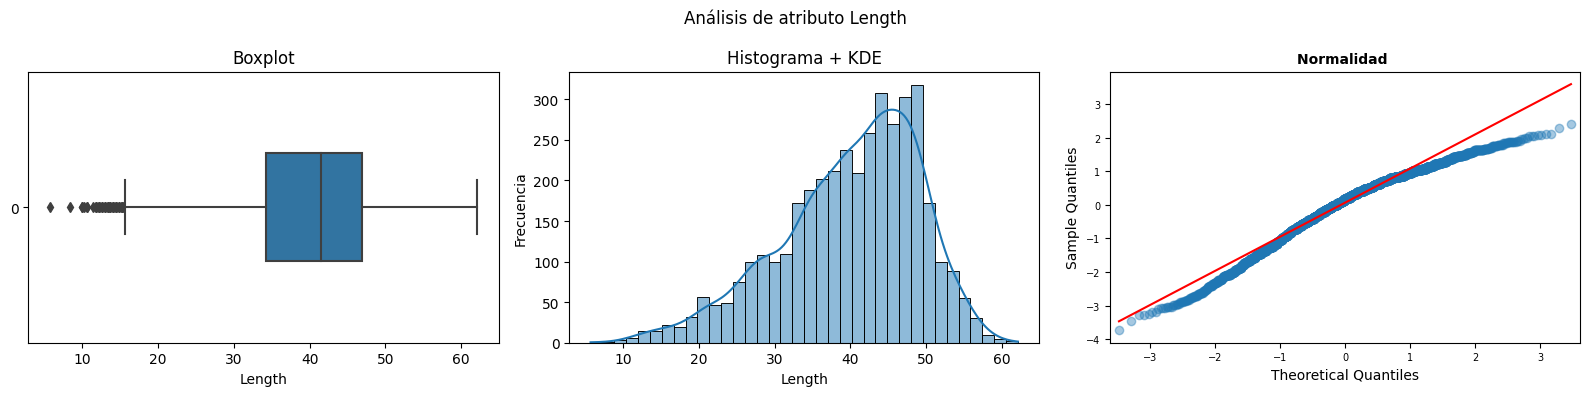

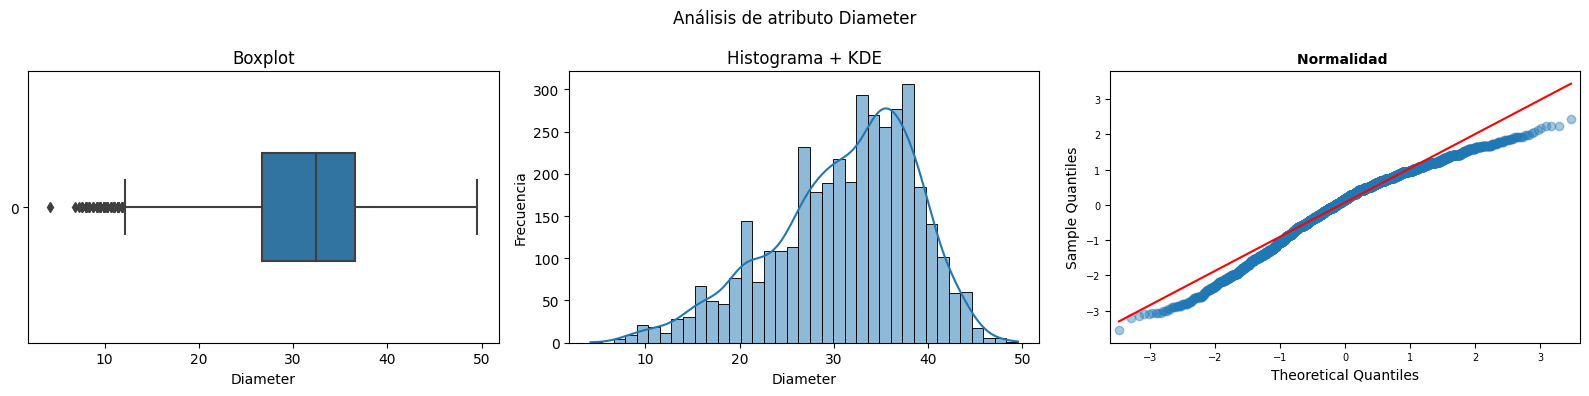

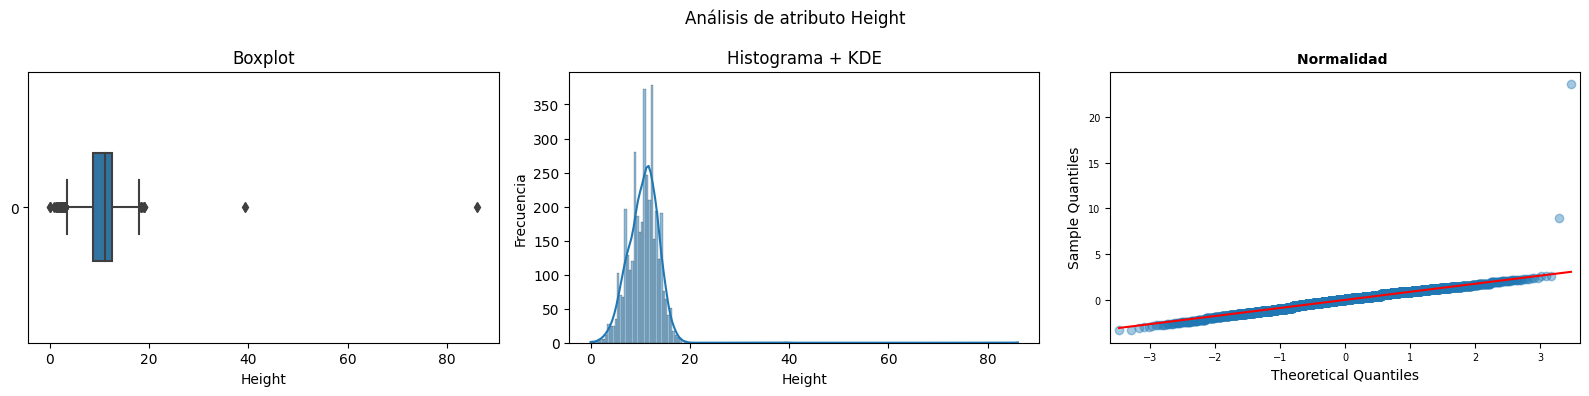

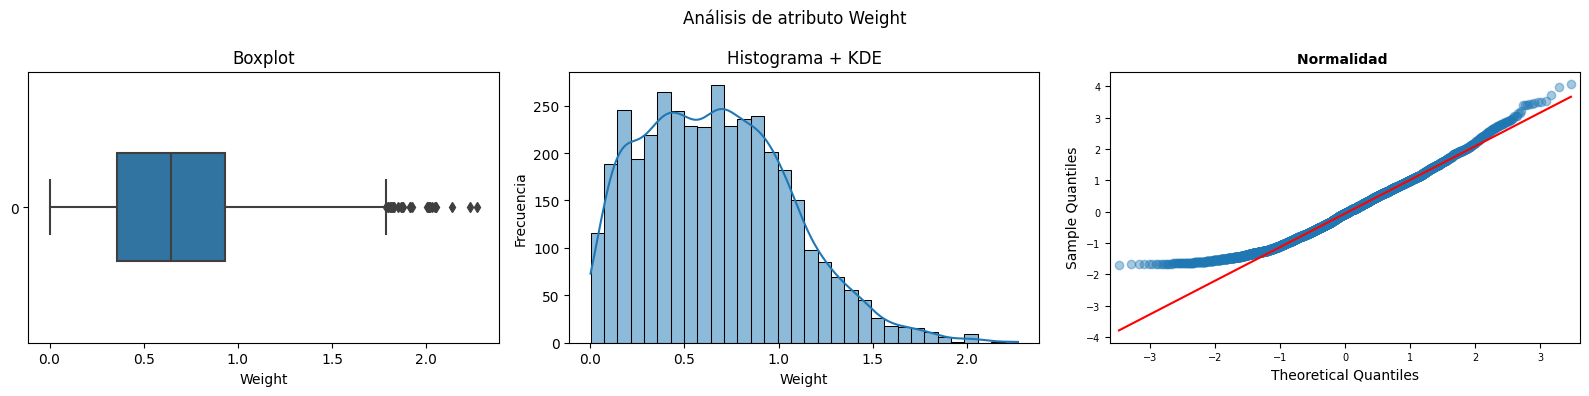

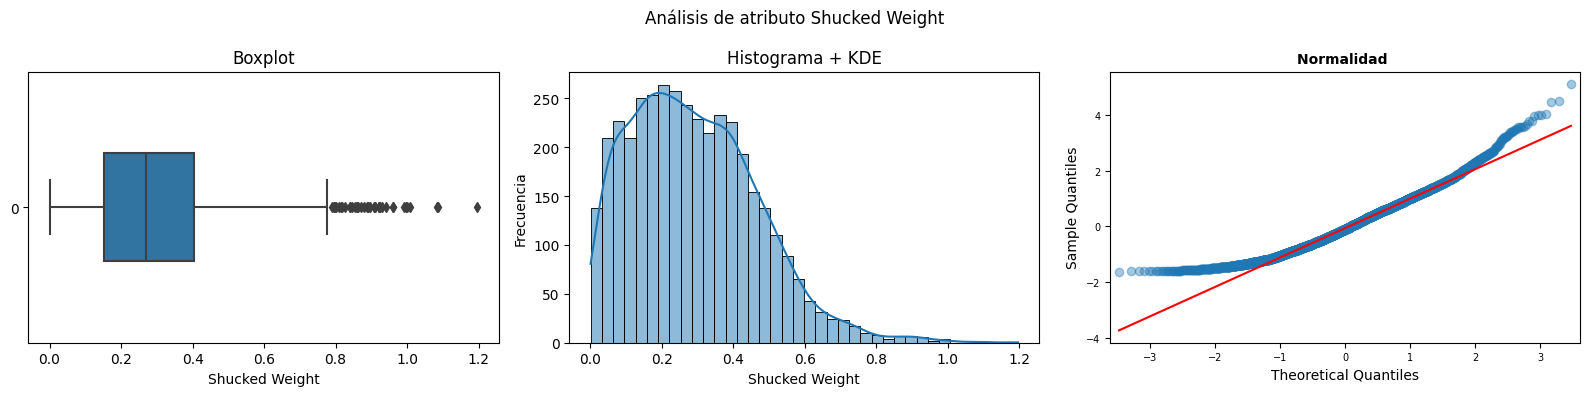

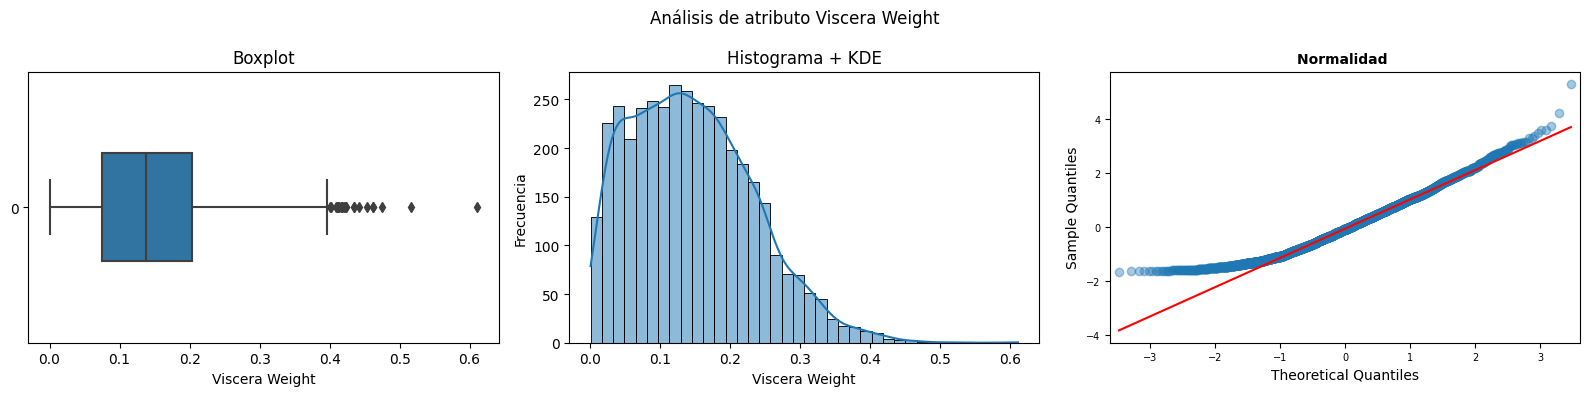

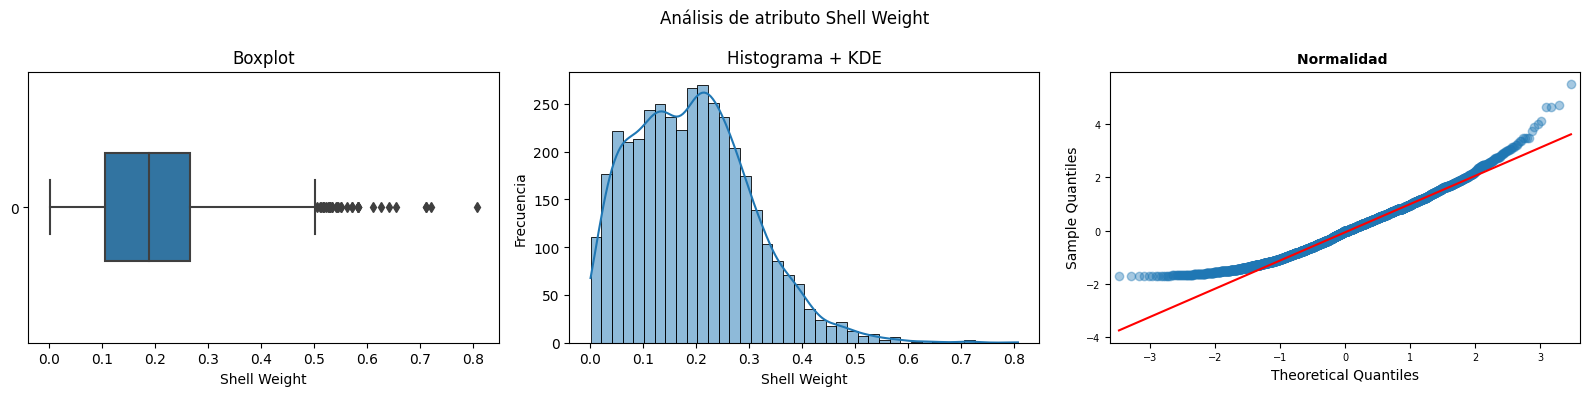

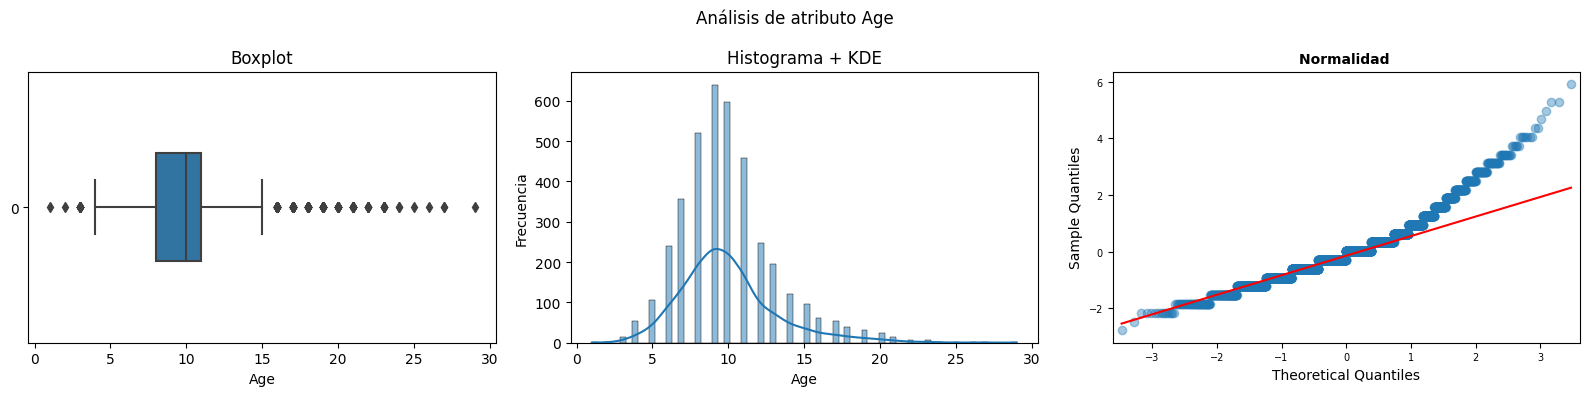

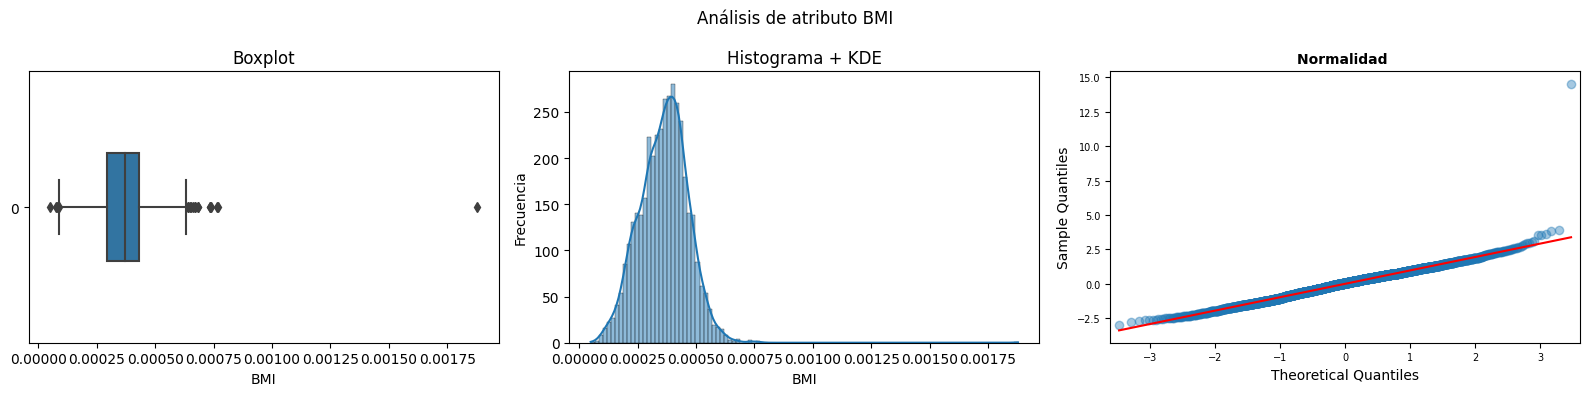

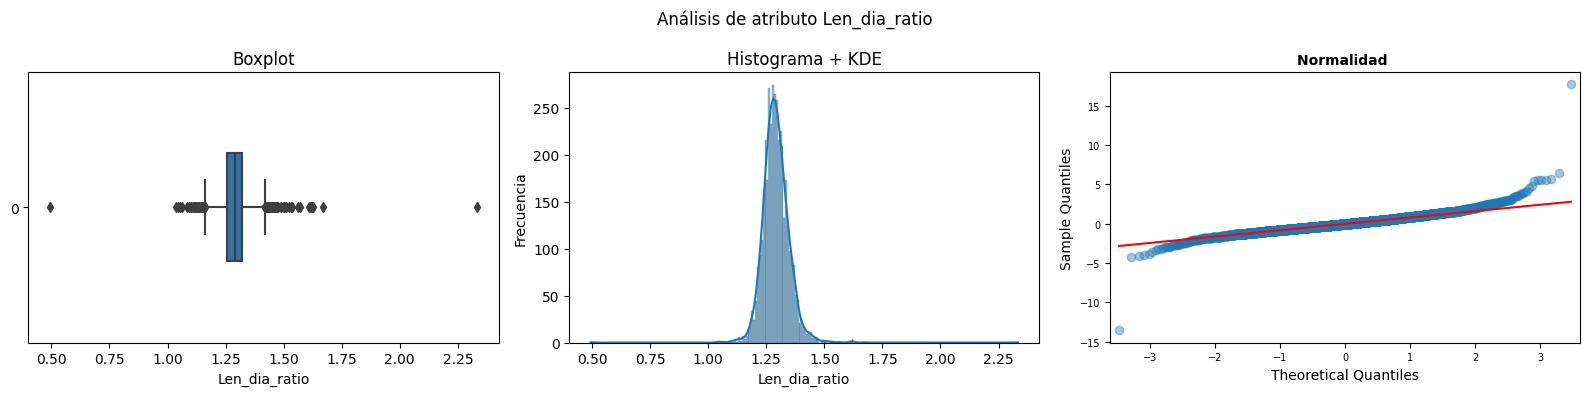

In [ ]:
GenerarPlotsUnivariados(dfCangre.iloc[:,1:])

A partir de los coeficientes de curtosis y asimetría, así como de las gráficos anteriores, se verifican:
- "Height": en la inspección visual se puede ver como la gráfica es practicamente normal, pero se ve bastante afectada por los outliers que tiene.
- "Age": los outliers que tiene afectan a la distribución normal que intenta seguir la gráfica;
- Las variables "BMI" y "Len_dia_ratio" presentan distribuciones normales, aunque al ser combinaciones de otras originales, presentan valores atípicos también.
- Las demás en general presentan coeficientes de curtosis y asimetría que están en el rango de -1 y 1, y de los gráficos de Q-Q Plot se puede verificar una normalidad aceptable. También tienen valores atípicos;



In [ ]:
def Outliers_IQR(df, variable, remove=False):
   """
    Función para devolver outliers usando rango intercuartil

    Arguments:
      df: Pandas Dataframe
      variable(string): nombre de la columna
      remove(boolean): True para eliminar los outliers

    Retorna:
      Pandas Dataframe
   """
   #print("Tamaño original: " ,df[variable].count())
   q1=df[variable].quantile(0.25)
   q3=df[variable].quantile(0.75)

   IQR=q3-q1

   upper = q3 + 1.5 * IQR
   lower = q1 - 1.5 * IQR


   outliers = (df[variable] < lower) | (df[variable] > upper)
   print(f"Valores atípicos para {variable}: {df[outliers][variable].count()}")
   if remove:
    df = df[~outliers]
    print("Tamaño actual: ", df[variable].count())

In [ ]:
# Verificación de outliers
print(f"Cantidad total de registros: {dfCangre.shape[0]}")
print("---"*15)

for column in dfCangre.columns:

  Outliers_IQR(dfCangre,column)



Cantidad total de registros: 3893
---------------------------------------------
Valores atípicos para Sex: 0
Valores atípicos para Length: 45
Valores atípicos para Diameter: 58
Valores atípicos para Height: 42
Valores atípicos para Weight: 27
Valores atípicos para Shucked Weight: 41
Valores atípicos para Viscera Weight: 24
Valores atípicos para Shell Weight: 33
Valores atípicos para Age: 257
Valores atípicos para BMI: 19
Valores atípicos para Len_dia_ratio: 110


El número de outliers no es grande en ninguno de los casos, por lo que se decide eliminarlos para cada caso:

In [ ]:
# Se realiza manualmente lo siguiente, para decidir cuales variables modificar
Outliers_IQR(dfCangre,"Length", True)
Outliers_IQR(dfCangre,"Sex", True)
Outliers_IQR(dfCangre,"Diameter", True)
Outliers_IQR(dfCangre,"Weight", True)
Outliers_IQR(dfCangre,"Shucked Weight", True)
Outliers_IQR(dfCangre,"Viscera Weight", True)
Outliers_IQR(dfCangre,"Shell Weight", True)
Outliers_IQR(dfCangre,"BMI", True)
Outliers_IQR(dfCangre,"Len_dia_ratio", True)
# De las más afectadas por los outliers:
Outliers_IQR(dfCangre,"Height", True)
Outliers_IQR(dfCangre,"Age", True)

Valores atípicos para Length: 45
Tamaño actual:  3848
Valores atípicos para Sex: 0
Tamaño actual:  3893
Valores atípicos para Diameter: 58
Tamaño actual:  3835
Valores atípicos para Weight: 27
Tamaño actual:  3866
Valores atípicos para Shucked Weight: 41
Tamaño actual:  3852
Valores atípicos para Viscera Weight: 24
Tamaño actual:  3869
Valores atípicos para Shell Weight: 33
Tamaño actual:  3860
Valores atípicos para BMI: 19
Tamaño actual:  3874
Valores atípicos para Len_dia_ratio: 110
Tamaño actual:  3783
Valores atípicos para Height: 42
Tamaño actual:  3851
Valores atípicos para Age: 257
Tamaño actual:  3636


### Análisis bivariado

Se analiza el sexo frente a las demás variables.  
Si bien la idea es hacer un modelo de regresión, con la variable objetivo "age",se quieren visualizar posibles agrupaciones en referencia al sexo de los cangrejos.

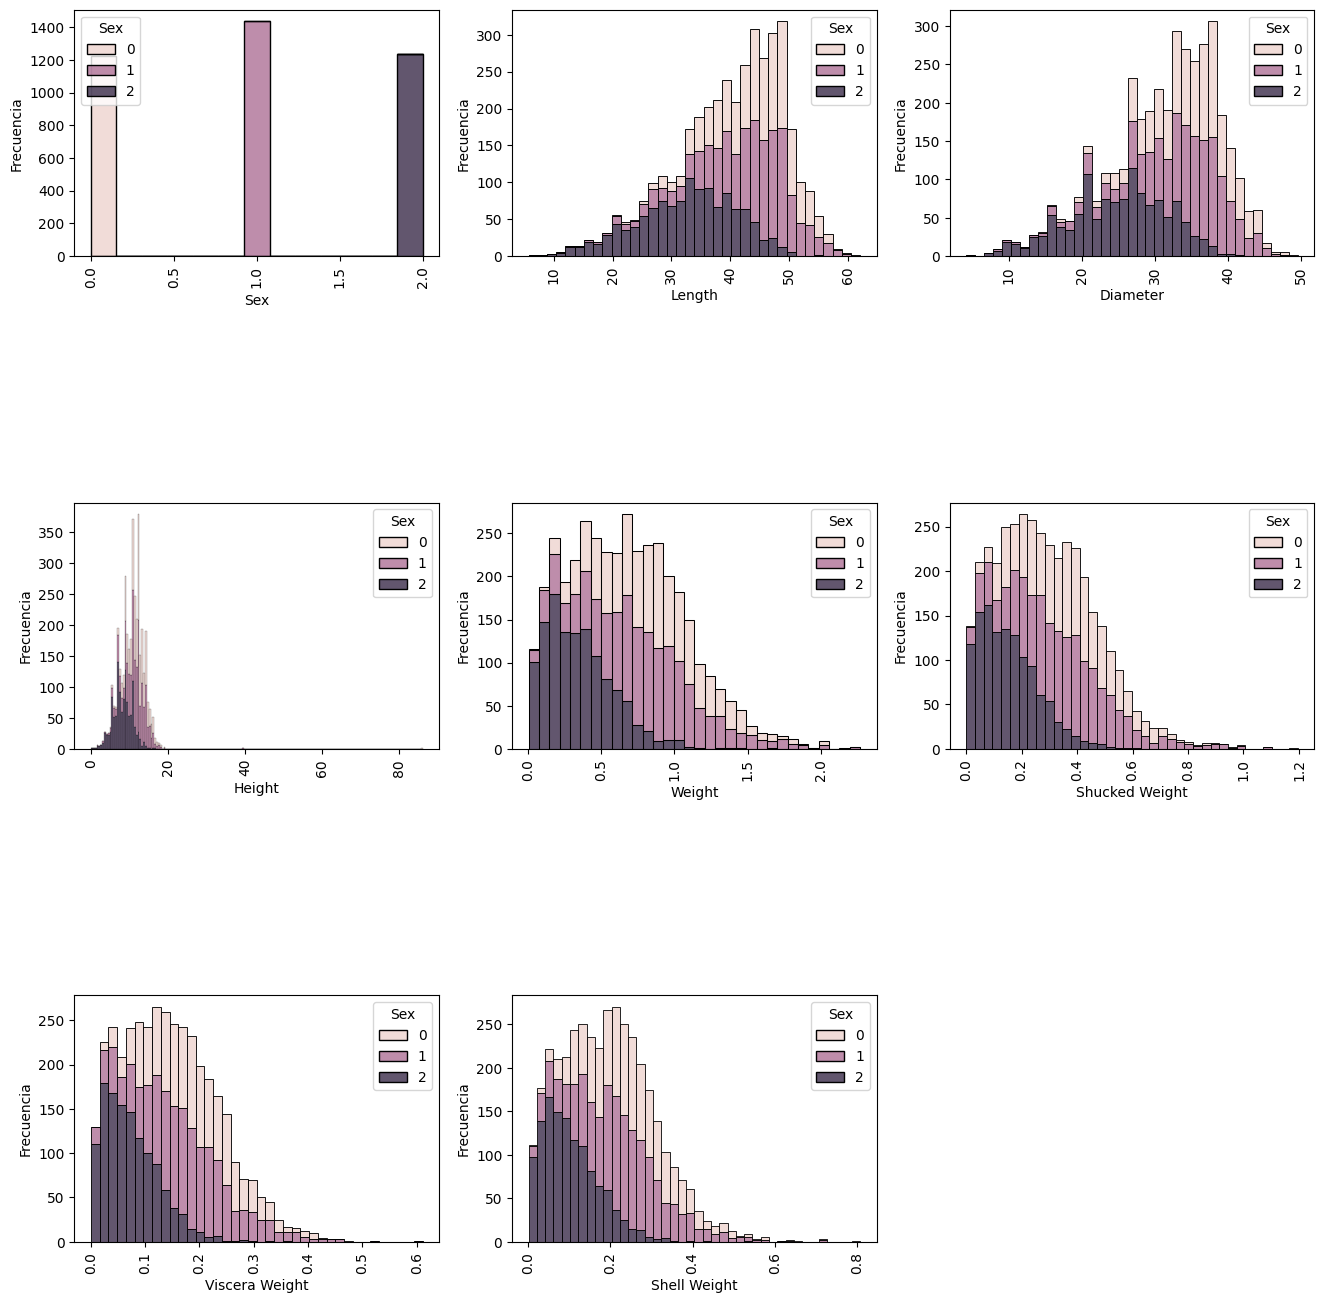

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 16), sharex=False)
NombresAtributos = dfCangre.columns
plt.subplots_adjust(hspace=1.0)
for i in range(3):
    for j in range(3):
        c = i * 3 + j
        if c < 8:  # cantidad de campos a graficar
            sns.histplot(
                data=dfCangre[NombresAtributos[c]],
                x=dfCangre[NombresAtributos[c]],
                label=NombresAtributos[c],
                ax=ax[i, j],
                hue=dfCangre['Sex'],
                multiple='stack'
            )
            ax[i, j].set_xlabel(NombresAtributos[c])
            ax[i, j].set_ylabel('Frecuencia')
            ax[i, j].tick_params(axis='x', rotation=90)
        else:
            # Si no hay más campos, ocultar el gráfico
            ax[i, j].axis('off')

plt.show()

### Análisis de correlación

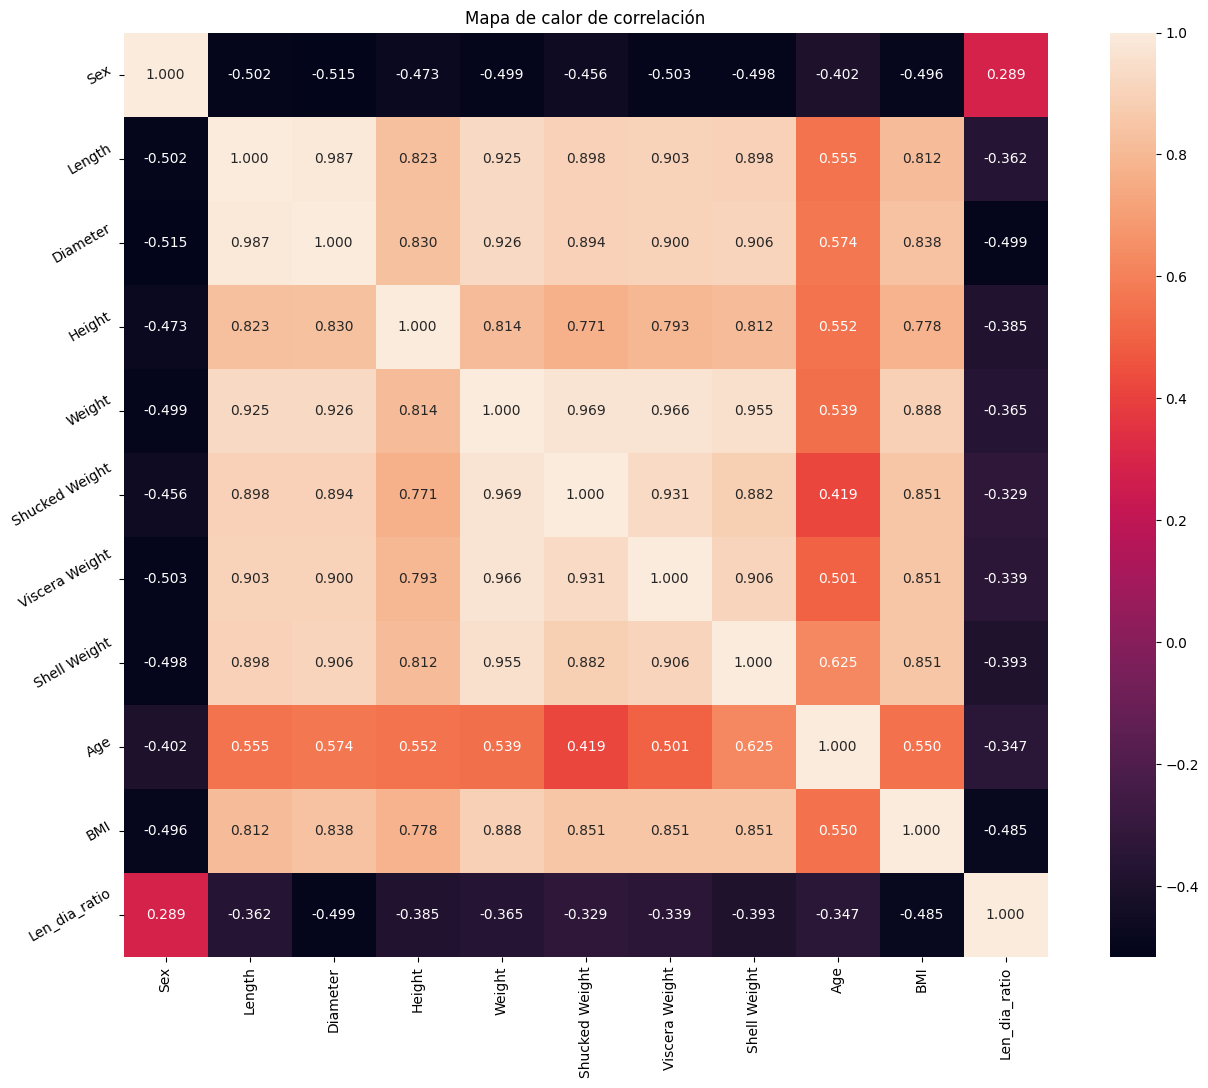

In [ ]:
corr = dfCangre.corr(method='pearson')

plt.figure(figsize=(16,12))
ax = sns.heatmap(corr, annot=True, square=True, fmt='.3f', linecolor='black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
ax.set_title('Mapa de calor de correlación')
plt.show();


Del análisis anterior se puede notar:

- una alta correlación entre "Weight" con "Length", "Diameter", "Shucked weight", "Viscera weight" y "shell weight" (algo lógico dado que son variables que contribuyen al peso del crustáceo). De ello se podría interpretar que "Weight" puede explicar esas variables, pudiendo prescindir de ellas para el modelo;


### Análisis multivariado

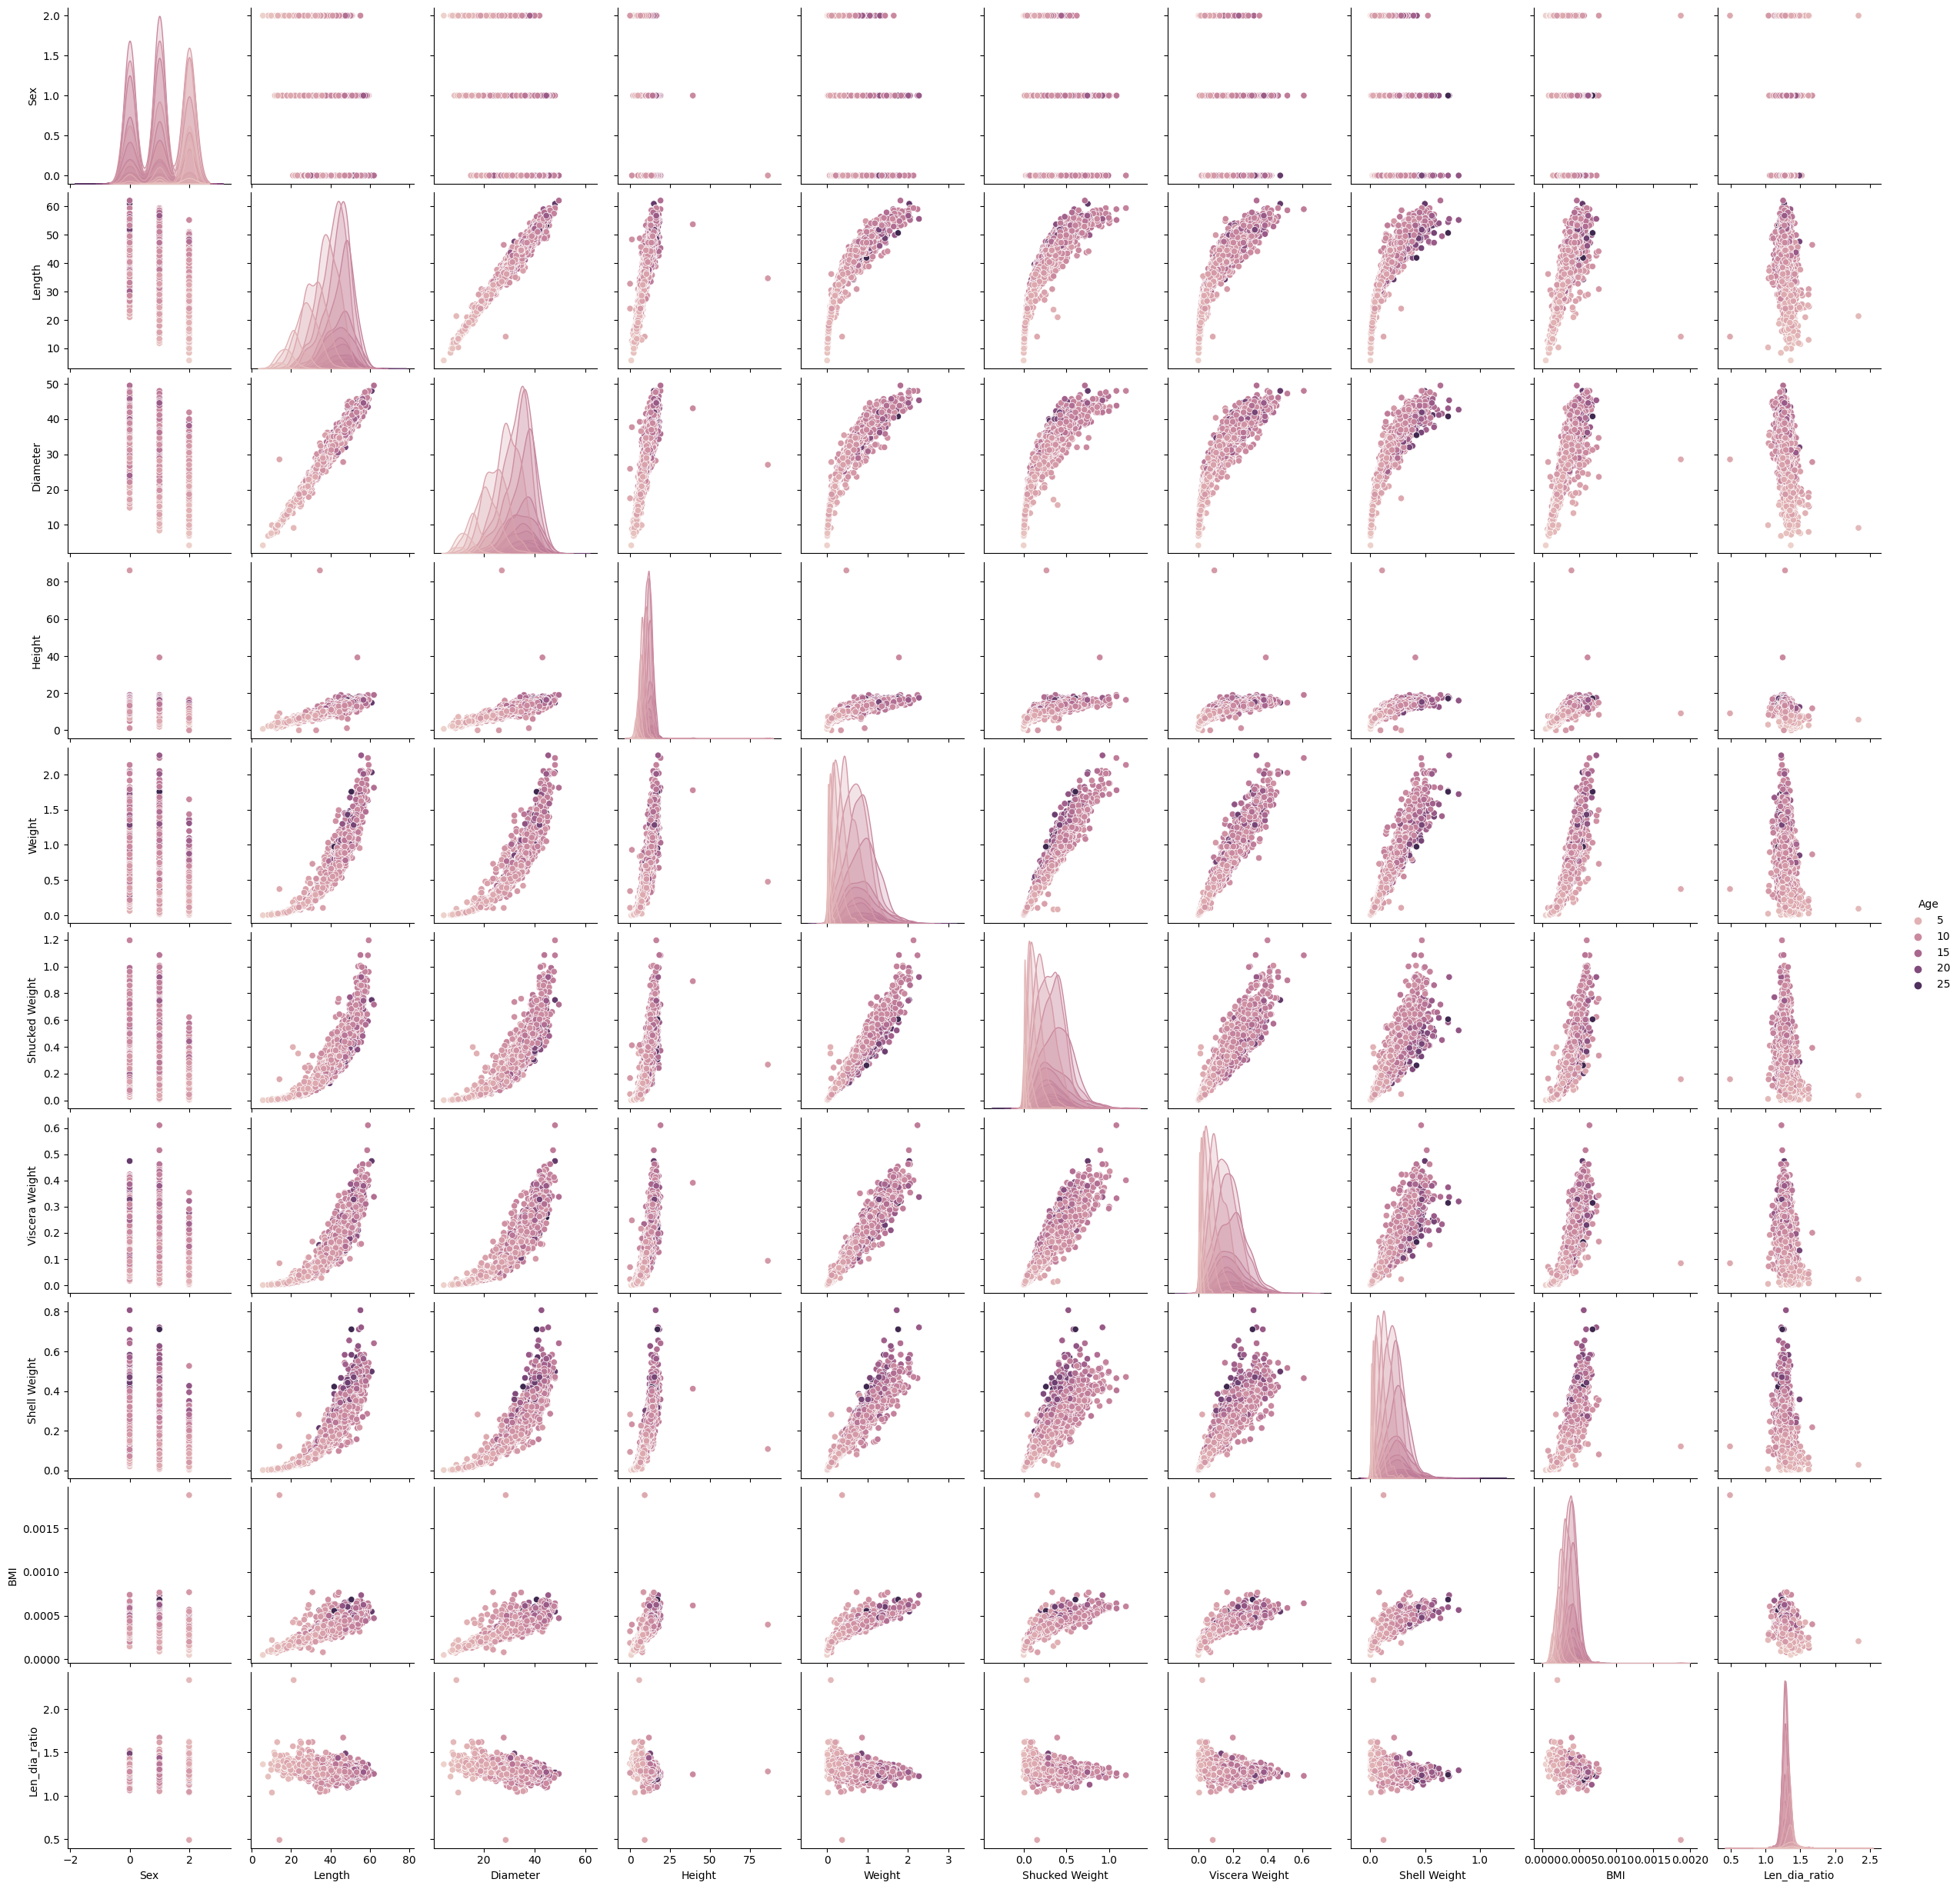

In [ ]:
sns.pairplot(dfCangre, hue="Age")

## Selección de características

- Solo se tienen en cuenta especímenes vivos, por lo tanto, "shucked weight", "viscera weight" y "shell weight" se descartan
- "weight" se descarta por tener alta correlación con "Length"
- "BMI" y "Len_dia_ratio" sí se emplea, como columnas para sumar información, dado que de otro modo quedarían solo algunas variables útiles.


In [ ]:
X = dfCangre[['Length', 'Height', 'Diameter', 'Sex','BMI','Len_dia_ratio']]
y = dfCangre['Age']

Para tener en cuenta, no por tener más variables esto implique un mejor modelo. La inclusión de variables adicionales reduce el RMSE y aumenta el R² para los datos de entrenamiento, por lo tanto estas métricas no son del todo apropiadas para indicar que el modelo sea realmente correcto.  

## Particionado de datos

In [ ]:
# Divide en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Entrenamiento del modelo

### Regresión lineal múltiple

Se elige el modelo de regresión lineal por ser un método simple y eficaz, y en principio porque permite conocer también la relación entre la variable objetivo y las predictoras.

> Luego de no considerar los atributos que podían explicarse en cierta forma con "Length", se descarta la multicolinealidad, y después de quitar los outliers, y en base a las gráficas de normalidad, histogramas y boxplot, se han podido lograr distribuciones con un buen grado de normalidad de los datos, como para poder proseguir aplicando el modelo de regresión.

In [ ]:
# genera el modelo de regresión
lr_model = LinearRegression()

# entrena el modelo
lr_model.fit(X_train, y_train)

# realiza las predicciones sobre test
y_pred = lr_model.predict(X_test)


In [ ]:
lr_model.intercept_

8.074655119959228

In [ ]:
lr_model.coef_

array([-2.60678204e-02,  1.71701755e-01,  1.40757874e-01, -4.79473143e-01,
        3.33559553e+03, -3.10184202e+00])

In [ ]:
# performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print(f'R-squared:{r2}')
print(f"Root Mean Squared Error: {rmse}")
print(f'Mean squared error: {mse}')

R-squared:0.38437199657362586
Root Mean Squared Error: 2.4763774983291884
Mean squared error: 6.1324455142311285


In [ ]:
# Definir los límites de edad para las categorías
bins = [0,7,  float('inf')]
labels = ['joven', 'adulto']

# Aplicar la categorización
dfCangre['Age_Category'] = pd.cut(dfCangre['Age'], bins=bins, labels=labels)

# Mostrar el DataFrame resultante


In [ ]:
# Conteo de adultos y jóvenes
value_counts = dfCangre['Age_Category'].value_counts()
value_counts

adulto    3120
joven      773
Name: Age_Category, dtype: int64

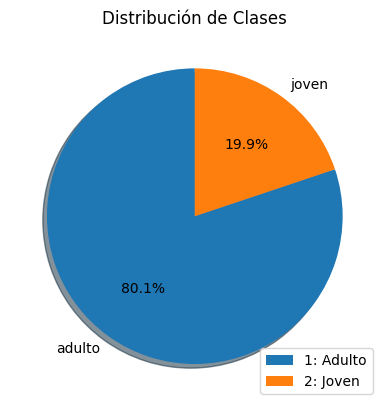

In [ ]:
# Crear una figura y un eje para el gráfico de torta
fig, ax = plt.subplots()
# Configurar etiquetas y porcentajes
labels = value_counts.index
sizes = value_counts.values
explode = (0.1, 0)  # Separa el primer sector (<=50K) del resto
# Generar el gráfico de torta
ax.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.set_title('Distribución de Clases')
plt.legend(["1: Adulto","2: Joven"],loc="lower right")
plt.show()

#Random Forest

Para la clasificación, se opta por Random Forest, dado que es un método poderoso y versátil, y que permite trabajar con varias columnas como predictoras.

In [ ]:
#columnas = ['Weight', 'Height', 'Sex']
#columnas = ['Weight', 'Sex']
columnas = ['Weight', 'Length', 'Height', 'Diameter','Sex','Shucked Weight','Viscera Weight', 'Shell Weight', 'BMI','Len_dia_ratio']
clases = ['Adulto','Joven']

##################################################################
# Se divide el dataset en entrenamiento y test.
##################################################################

X,y = dfCangre[columnas].values,dfCangre['Age_Category'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


Se automatiza el proceso de selección de hiperparámetros del árbol, utilizando la herramienta RandomizedSearchCV de SkLearn.

In [ ]:
#Hace el analisis
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Crear el conjunto de datos
#X, y = df(return_X_y=True)

# Definir los parámetros a optimizar
param_grid = {
    "n_estimators": [100, 200, 300], #n_estimators es el número de árboles en el bosque aleatorio.
    "max_depth": [3, 4, 5,6], #max_depth es la profundidad máxima de los árboles en el bosque aleatorio. Si pasa de ese numero se descarta el arbol. Si el conjunto de datos pequeño, es recomendable utilizar un valor bajo para evitar sobreajuste
    "min_samples_split": [2, 3, 4, 5, 6], #min_samples_split es el número mínimo de muestras necesarias para dividir un nodo interno en el árbol.Si el conjunto de datos pequeño, es recomendable utilizar un valor bajo para evitar sobreajuste
    "min_samples_leaf": [10,11,12,13], #min_samples_leaf es el número mínimo de muestras necesarias para que un nodo sea una hoja en el árbol.Si el conjunto de datos pequeño, es recomendable utilizar un valor alto para evitar sobreajuste
    "criterion": ["gini", "entropy"]
}


# Crear el modelo
model = RandomForestClassifier()

# En base al modelo y a los hiperparámetros se van generando diferentes arboles
random_search = RandomizedSearchCV(
    model, param_grid, scoring="accuracy", n_iter=10
)
random_search.fit(X, y)

#Imprime la combinación que le dió mejor precisión
print(random_search.best_params_)

# Imprimir la precisión
print(random_search.best_score_)

{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 6, 'criterion': 'entropy'}
0.909838267371985


In [ ]:
# Se seleccioina el mejor modelo
best_model = random_search.best_estimator_
tree = best_model.estimators_[0]

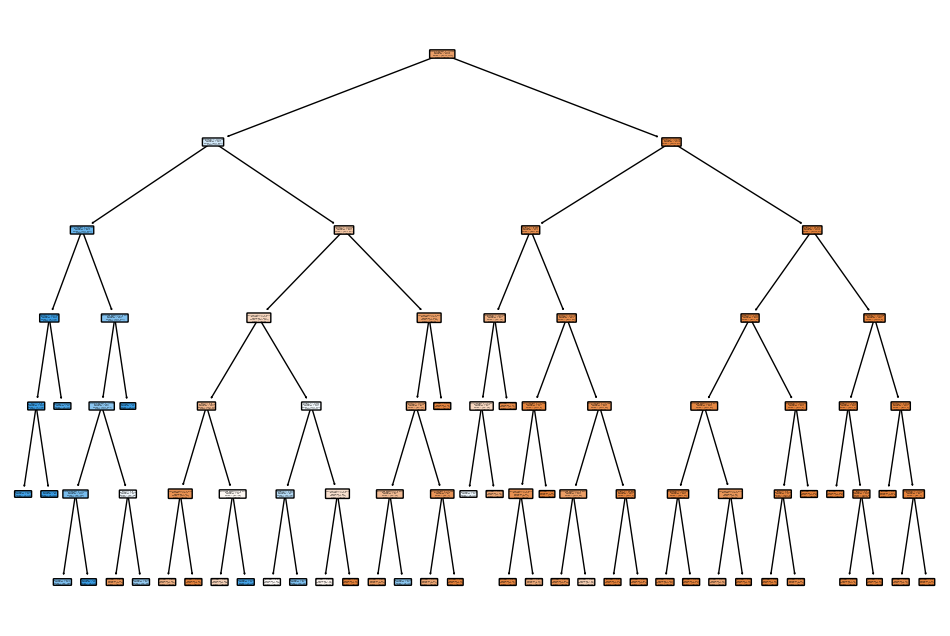

In [ ]:
# Se muestra el arbol de decisión
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, rounded=True, class_names=clases, feature_names=columnas)
plt.show()

              precision    recall  f1-score   support

      adulto       0.94      0.97      0.95       937
       joven       0.84      0.74      0.79       231

    accuracy                           0.92      1168
   macro avg       0.89      0.85      0.87      1168
weighted avg       0.92      0.92      0.92      1168



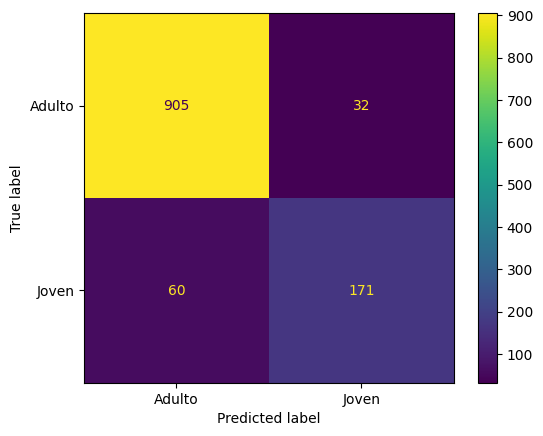

In [ ]:
# Matriz de confusión
y_pred=random_search.predict(X_test)
mc_arbol1=confusion_matrix(y_test, y_pred) #Matriz de confusion con las etiquetas reales de Test y los valores predichos
mc_visual = metrics.ConfusionMatrixDisplay(confusion_matrix = mc_arbol1, display_labels = clases)
mc_visual.plot()
# Reporte de clasificación
print(classification_report(y_test, y_pred))

In [ ]:
print("Verdaderos positivos: ", mc_arbol1[0][0])
print("Verdaderos negativos: ", mc_arbol1[1][1])
print("Falsos positivos: ", mc_arbol1[1][0])
print("Falsos negativos: ", mc_arbol1[0][1])
print()
err = (mc_arbol1[1][0] + mc_arbol1[0][1]) / (mc_arbol1[0][0] + mc_arbol1[0][1] +mc_arbol1[1][0] +mc_arbol1[1][1]) * 100
print(f"Error: {err:.2f}")

Verdaderos positivos:  905
Verdaderos negativos:  171
Falsos positivos:  60
Falsos negativos:  32

Error: 7.88


# Conclusiones

Con los datos suministrados, y luego de haber filtrado columnas innecesarias o contraproducentes para la efectividad del modelo, el resultado luego de aplicar la regresión lineal fue algo bajo, con un $R^2$ cercano a 0.3844. Esto indica que la información no es realmente útil como para poder confiar en un análisis de regresión para poder predecir la edad.  
Si bien se eliminaron atributos, para evitar la multicolinealidad, se probó también usar todas las columnas originales para el modelo,y el valor $R^2$ tuvo un aumento a 0.55, algo que no es sustancial. Sin embargo, se estaría alimentando el modelo con datos que en definitiva no aportan información, y su salida sería erróneamente interpretada.  
El agregado las columnas 'BMI' y 'Len_dia_ratio', siendo columnas generadas a partir de otras, tuvo algo de ingerencia, pero no demasiada.

De lo anterior entonces surgió la idea de cambiar el enfoque para hacer una clasifiacación según una categoría de edad, por "adultos" y "jóvenes", lo que sería un método directo (binario) para detección de cangrejos aptos.  
Se procedió a realizar un modelo de Random Forest, y los resultados fueron bastante buenos, logrando un accuracy de 0.92 y un recall de 0.87.